<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
covid_data = pd.read_csv('covid_19_data.csv')
display(covid_data.head())

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
vaccinations_data = pd.read_csv('country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data['country'] = covid_data['Country/Region']

In [4]:
covid_data = covid_data.groupby(
    ['ObservationDate', 'country'], 
    as_index=False
)[['Confirmed', 'Deaths', 'Recovered']].sum()

In [5]:
covid_data['date'] = pd.to_datetime(covid_data['ObservationDate'])

In [6]:
covid_data['active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']

In [7]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['Confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['Deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['Recovered'].diff()

In [8]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [9]:
covid_data = covid_data.sort_values(by=['country', 'date'])

In [10]:
vaccinations_data['date'].max()

Timestamp('2022-03-29 00:00:00')

In [11]:
covid_df = covid_data.merge(vaccinations_data, on=['date'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  4362620
Число столбцов:  18


In [12]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  87281
Число столбцов:  17


In [13]:
covid_df[covid_df['country']=='US']

ObservationDate country   Confirmed    Deaths  Recovered       date  \
81663      01/22/2020      US         1.0       0.0        0.0 2020-01-22   
81664      01/23/2020      US         1.0       0.0        0.0 2020-01-23   
81665      01/24/2020      US         2.0       0.0        0.0 2020-01-24   
81666      01/25/2020      US         2.0       0.0        0.0 2020-01-25   
81667      01/26/2020      US         5.0       0.0        0.0 2020-01-26   
...               ...     ...         ...       ...        ...        ...   
82152      05/25/2021      US  33166418.0  590941.0        0.0 2021-05-25   
82153      05/26/2021      US  33190470.0  591950.0        0.0 2021-05-26   
82154      05/27/2021      US  33217995.0  593288.0        0.0 2021-05-27   
82155      05/28/2021      US  33239963.0  593963.0        0.0 2021-05-28   
82156      05/29/2021      US  33251939.0  594306.0        0.0 2021-05-29   

           active  daily_confirmed  daily_deaths  daily_recovered  \
81663         1.0              NaN           NaN              NaN   
81664         1.0              0.0           0.0              0.0   
81665         2.0              1.0           0.0              0.0   
81666         2.0              0.0           0.0              0.0   
81667         5.0              3.0           0.0              0.0   
...           ...              ...           ...              ...   
82152  32575477.0          22756.0         621.0              0.0   
82153  32598520.0          24052.0        1009.0              0.0   
82154  32624707.0          27525.0        1338.0              0.0   
82155  32646000.0          21968.0         675.0              0.0   
82156  32657633.0          11976.0         343.0              0.0   

       total_vaccinations  people_vaccinated  people_vaccinated_per_hundred  \
81663                 NaN                NaN                            NaN   
81664                 NaN                NaN                            NaN   
81665                 NaN                NaN                            NaN   
81666                 NaN                NaN                            NaN   
81667                 NaN                NaN                            NaN   
...                   ...                ...                            ...   
82152                 NaN                NaN                            NaN   
82153                 NaN                NaN                            NaN   
82154                 NaN                NaN                            NaN   
82155                 NaN                NaN                            NaN   
82156                 NaN                NaN                            NaN   

       people_fully_vaccinated  people_fully_vaccinated_per_hundred  \
81663                      NaN                                  NaN   
81664                      NaN                                  NaN   
81665                      NaN                                  NaN   
81666                      NaN                                  NaN   
81667                      NaN                                  NaN   
...                        ...                                  ...   
82152                      NaN                                  NaN   
82153                      NaN                                  NaN   
82154                      NaN                                  NaN   
82155                      NaN                                  NaN   
82156                      NaN                                  NaN   

       daily_vaccinations vaccines  
81663                 NaN      NaN  
81664                 NaN      NaN  
81665                 NaN      NaN  
81666                 NaN      NaN  
81667                 NaN      NaN  
...                   ...      ...  
82152                 NaN      NaN  
82153                 NaN      NaN  
82154                 NaN      NaN  
82155                 NaN      NaN  
82156                 NaN      NaN  

[494 

In [44]:
covid_df[covid_df['country']=='US'].sort_values(by=['death_rate'])

ObservationDate country  Confirmed   Deaths  Recovered       date  \
81663      01/22/2020      US        1.0      0.0        0.0 2020-01-22   
81685      02/13/2020      US       15.0      0.0        3.0 2020-02-13   
81686      02/14/2020      US       15.0      0.0        3.0 2020-02-14   
81687      02/15/2020      US       15.0      0.0        3.0 2020-02-15   
81688      02/16/2020      US       15.0      0.0        3.0 2020-02-16   
...               ...     ...        ...      ...        ...        ...   
81778      05/16/2020      US  1469104.0  89191.0   268376.0 2020-05-16   
81775      05/13/2020      US  1391915.0  84562.0   243430.0 2020-05-13   
81776      05/14/2020      US  1418928.0  86357.0   246414.0 2020-05-14   
81777      05/15/2020      US  1444045.0  87982.0   250747.0 2020-05-15   
81705      03/04/2020      US      153.0     11.0        8.0 2020-03-04   

          active  daily_confirmed  daily_deaths  daily_recovered  \
81663        1.0              NaN           NaN              NaN   
81685       12.0              2.0           0.0              0.0   
81686       12.0              0.0           0.0              0.0   
81687       12.0              0.0           0.0              0.0   
81688       12.0              0.0           0.0              0.0   
...          ...              ...           ...              ...   
81778  1111537.0          25059.0        1209.0          17629.0   
81775  1063923.0          20723.0        1700.0          13143.0   
81776  1086157.0          27013.0        1795.0           2984.0   
81777  1105316.0          25117.0        1625.0           4333.0   
81705      134.0             31.0           4.0              0.0   

       total_vaccinations  people_vaccinated  people_vaccinated_per_hundred  \
81663                 NaN                NaN                            NaN   
81685                 NaN                NaN                            NaN   
81686                 NaN                NaN                            NaN   
81687                 NaN                NaN                            NaN   
81688                 NaN                NaN                            NaN   
...                   ...                ...                            ...   
81778                 NaN                NaN                            NaN   
81775                 NaN                NaN                            NaN   
81776                 NaN                NaN                            NaN   
81777                 NaN                NaN                            NaN   
81705                 NaN                NaN                            NaN   

       people_fully_vaccinated  people_fully_vaccinated_per_hundred  \
81663                      NaN                                  NaN   
81685                      NaN                                  NaN   
81686                      NaN                                  NaN   
81687                      NaN                                  NaN   
81688                      NaN                                  NaN   
...                        ...                                  ...   
81778                      NaN                                  NaN   
81775                      NaN                                  NaN   
81776                      NaN                                  NaN   
81777                      NaN                                  NaN   
81705                      NaN                                  NaN   

       daily_vaccinations vaccines  death rate  death_rate  
81663                 NaN      NaN    0.000000    0.000000  
81685                 NaN      NaN    0.000000    0.000000  
81686                 NaN      NaN    0.000000    0.000000  
81687                 NaN      NaN    0.000000    0.000000  
81688                 NaN      NaN    0.000000    0.000000  
...                   ...      ...         ...         ...  
81778                 NaN      NaN    0.060711    0.060711 

In [49]:
covid_df['death_rate'] = covid_df['Deaths']/covid_df['Confirmed']*100
covid_df['recover_rate'] = covid_df['Recovered']/covid_df['Confirmed']*100

In [50]:
covid_df[covid_df['country']=='Russia']['recover_rate'].mean()

67.06273489477655

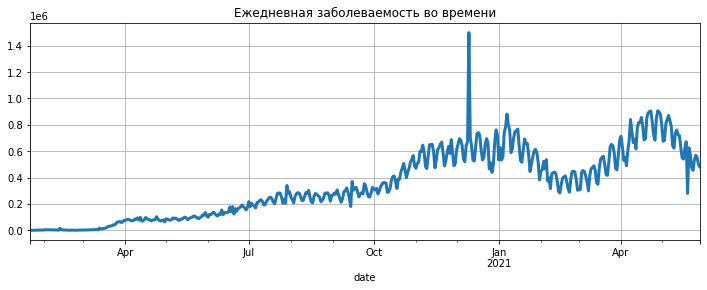

In [51]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

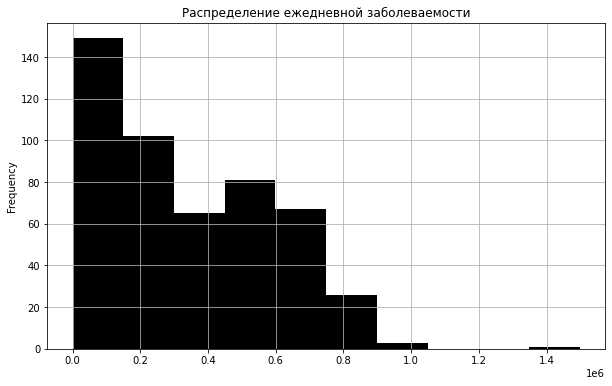

In [52]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

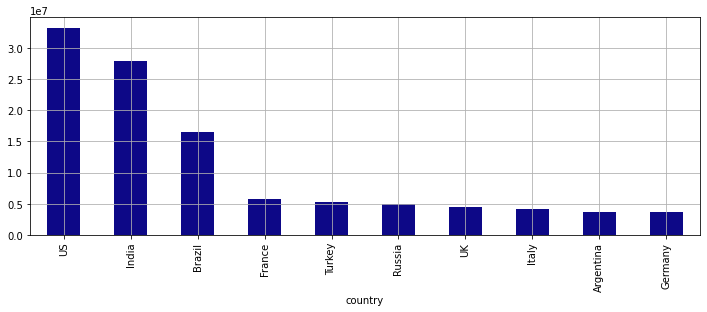

In [53]:
grouped_country = covid_df.groupby(['country'])['Confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

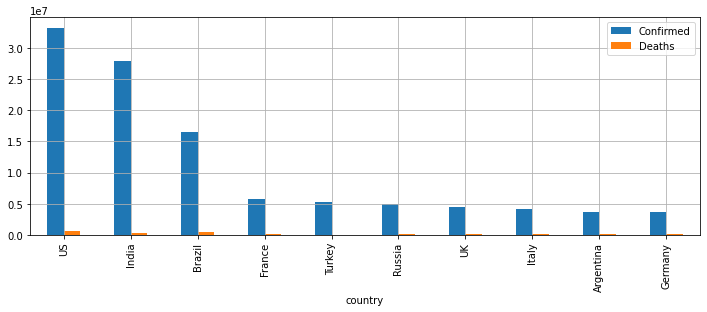

In [54]:
grouped_country = covid_df.groupby(['country'])[['Confirmed', 'Deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['Confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

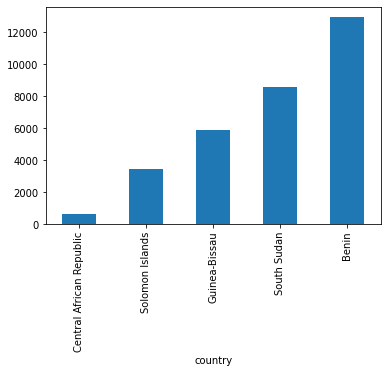

In [55]:

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [56]:
import matplotlib.pyplot as plt

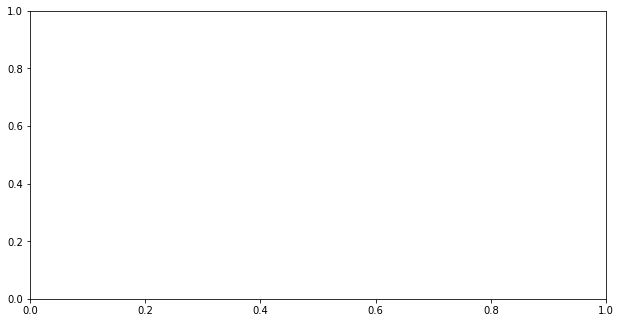

In [57]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

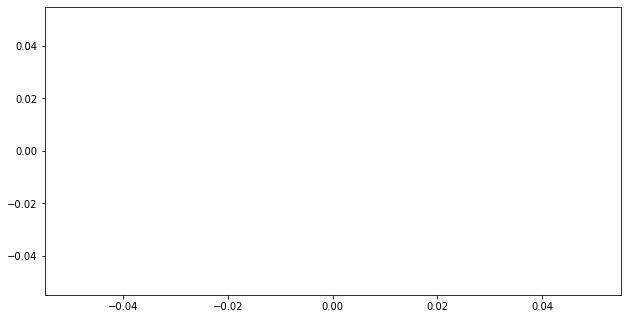

In [58]:
us_data = covid_df[covid_df['country'] == 'US']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

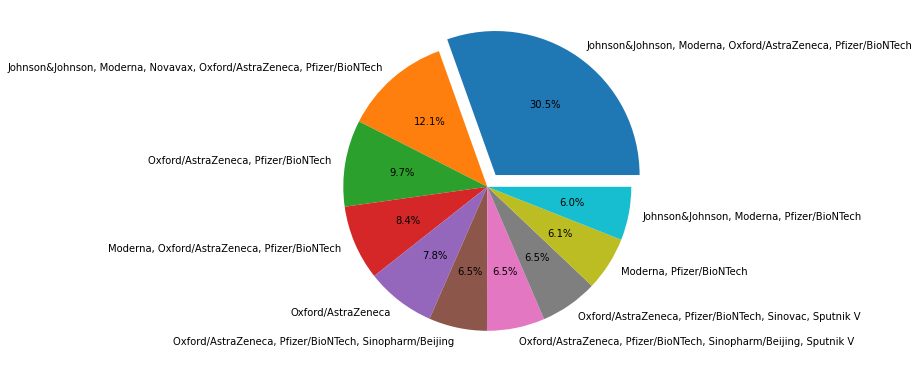

In [59]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

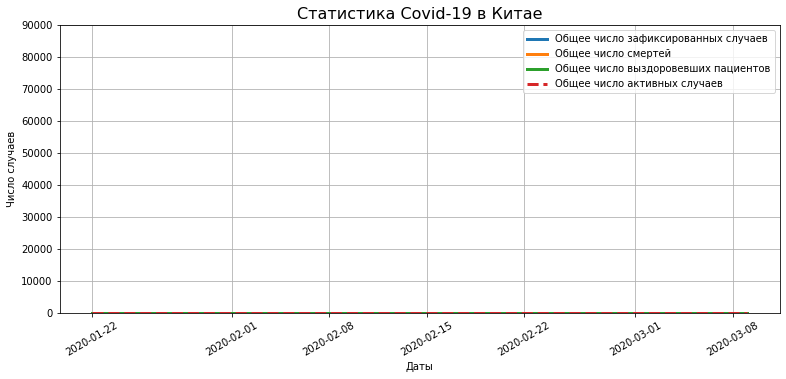

In [60]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['Confirmed', 'active', 'Deaths', 'Recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['Confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['Deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['Recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

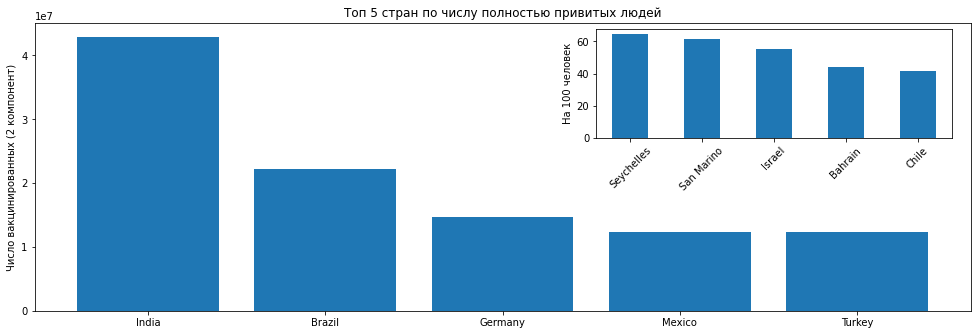

In [61]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

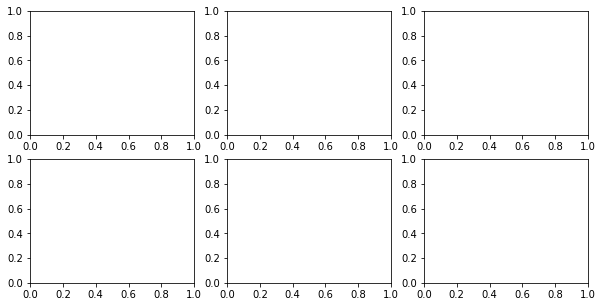

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

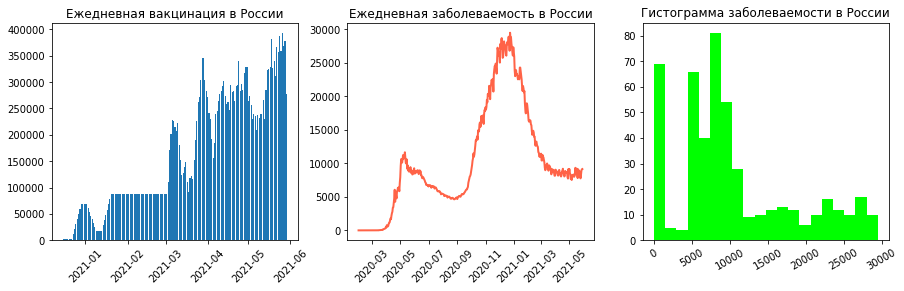

In [63]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

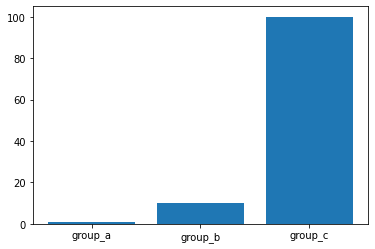

In [64]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

In [65]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [66]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

ObservationDate    country  Confirmed  Deaths  Recovered       date  active  \
0      01/23/2020  Australia        0.0     0.0        0.0 2020-01-23     0.0   
1      01/25/2020  Australia        4.0     0.0        0.0 2020-01-25     4.0   
2      01/26/2020  Australia        4.0     0.0        0.0 2020-01-26     4.0   
3      01/27/2020  Australia        5.0     0.0        0.0 2020-01-27     5.0   
4      01/28/2020  Australia        5.0     0.0        0.0 2020-01-28     5.0   

   daily_confirmed  daily_deaths  daily_recovered  ...  \
0              NaN           NaN              NaN  ...   
1              4.0           0.0              0.0  ...   
2              0.0           0.0              0.0  ...   
3              1.0           0.0              0.0  ...   
4              0.0           0.0              0.0  ...   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  vaccines  \
0                                  NaN                 NaN       NaN   
1                                  NaN                 NaN       NaN   
2                                  NaN                 NaN       NaN   
3                                  NaN                 NaN       NaN   
4                                  NaN                 NaN       NaN   

   death rate death_rate  recover_rate  population  \
0         NaN        NaN           NaN    25726900   
1         0.0        0.0           0.0    25726900   
2         0.0        0.0           0.0    25726900   
3         0.0        0.0           0.0    25726900   
4         0.0        0.0           0.0    25726900   

   daily_confirmed_per_hundred  
0                          NaN  
1                     0.000016  
2                     0.000000  
3                     0.000004  
4                     0.000000  

[5 rows x 22 columns]

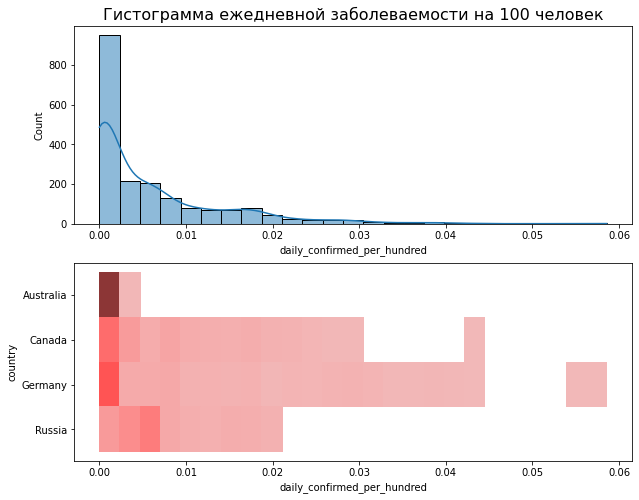

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

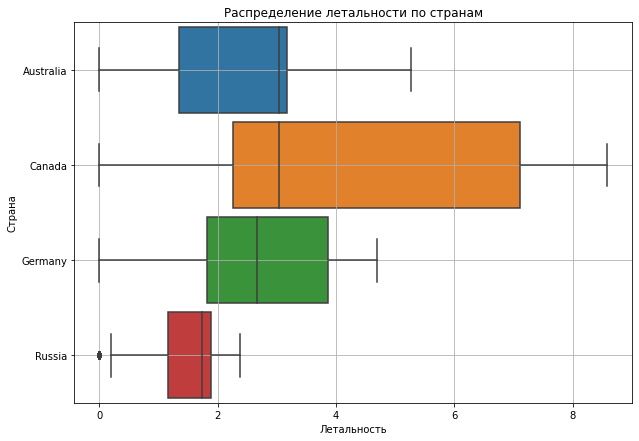

In [68]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

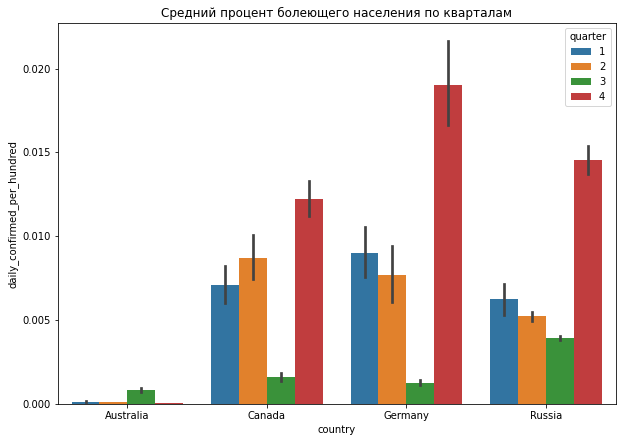

In [69]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

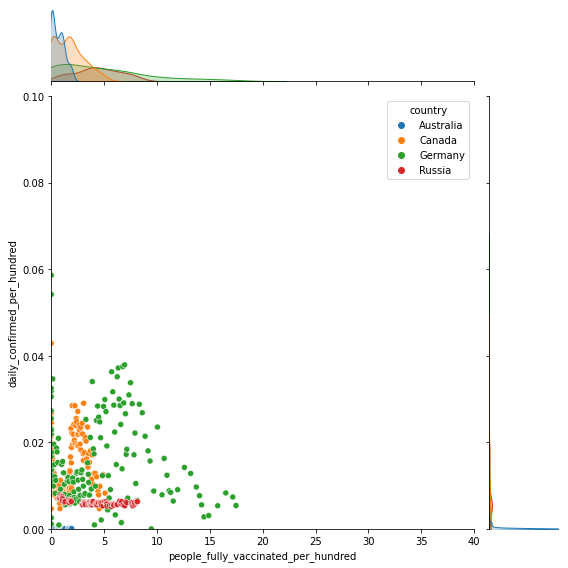

In [70]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [71]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date       2020-12-14  2020-12-15  2020-12-16  2020-12-17  2020-12-18  \
country                                                                 
Australia         NaN         NaN         NaN         NaN         NaN   
Canada            0.0        0.00        0.01        0.02        0.03   
Germany           NaN         NaN         NaN         NaN         NaN   
Russia            NaN        0.02         NaN         NaN         NaN   

date       2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-23  ...  \
country                                                                ...   
Australia         NaN         NaN         NaN         NaN         NaN  ...   
Canada           0.03        0.03        0.06        0.07        0.09  ...   
Germany           NaN         NaN         NaN         NaN         NaN  ...   
Russia            NaN         NaN         NaN        0.04         NaN  ...   

date       2021-05-20  2021-05-21  2021-05-22  2021-05-23  2021-05-24  \
country                                                                 
Australia       11.78         NaN         NaN         NaN       12.62   
Canada          48.41       49.55       50.44       51.20       52.08   
Germany         39.29       39.79       40.06       40.22       40.40   
Russia          10.20       10.30       10.50       10.53       10.70   

date       2021-05-25  2021-05-26  2021-05-27  2021-05-28  2021-05-29  
country                                                                
Australia       12.88       13.28       13.73       14.18       14.40  
Canada          52.69       53.40       54.27       55.29       56.02  
Germany         40.76       41.41       41.99       42.52       42.73  
Russia          10.81       11.07       11.12       11.19       11.29  

[4 rows x 167 columns]

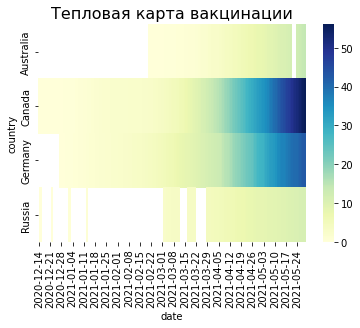

In [72]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [76]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['Confirmed']/croped_covid_df['population']*100

In [77]:
pivot1 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date       2020-12-14  2020-12-15  2020-12-16  2020-12-17  2020-12-18  \
country                                                                 
Australia         NaN         NaN         NaN         NaN         NaN   
Canada            0.0        0.00        0.01        0.02        0.03   
Germany           NaN         NaN         NaN         NaN         NaN   
Russia            NaN        0.02         NaN         NaN         NaN   

date       2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-23  ...  \
country                                                                ...   
Australia         NaN         NaN         NaN         NaN         NaN  ...   
Canada           0.03        0.03        0.06        0.07        0.09  ...   
Germany           NaN         NaN         NaN         NaN         NaN  ...   
Russia            NaN         NaN         NaN        0.04         NaN  ...   

date       2021-05-20  2021-05-21  2021-05-22  2021-05-23  2021-05-24  \
country                                                                 
Australia       11.78         NaN         NaN         NaN       12.62   
Canada          48.41       49.55       50.44       51.20       52.08   
Germany         39.29       39.79       40.06       40.22       40.40   
Russia          10.20       10.30       10.50       10.53       10.70   

date       2021-05-25  2021-05-26  2021-05-27  2021-05-28  2021-05-29  
country                                                                
Australia       12.88       13.28       13.73       14.18       14.40  
Canada          52.69       53.40       54.27       55.29       56.02  
Germany         40.76       41.41       41.99       42.52       42.73  
Russia          10.81       11.07       11.12       11.19       11.29  

[4 rows x 167 columns]

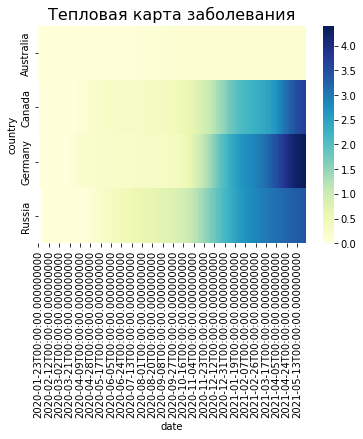

In [79]:
heatmap = sns.heatmap(data=pivot1, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболевания', fontsize=16);

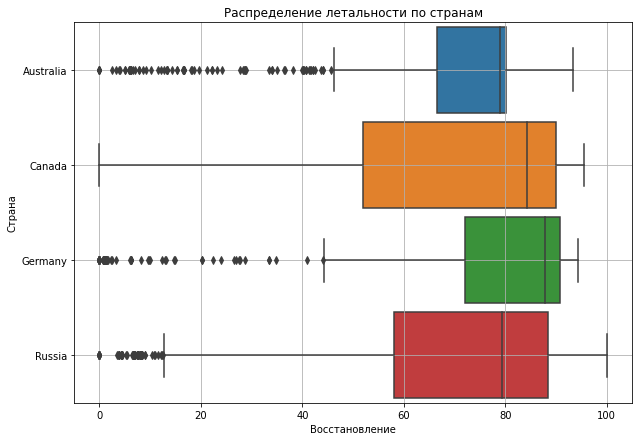

In [81]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Восстановление');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [82]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.5.0


In [84]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['Confirmed', 'Recovered', 'Deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

In [85]:
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

In [86]:
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем график
fig.show()

In [95]:
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale="Reds" #палитра цветов
)

#отображаем график
fig.show()

In [96]:
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()
fig.write_html("plotly/scatter_3d.html")

FileNotFoundError: ignored

In [98]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['daily_vaccinations'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='daily_vaccinations cases over Time' #заголовок
)
fig.show()

In [99]:
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale="Reds" #палитра цветов
)

#отображаем график
fig.show()